# Introduction

The internet is a rich source of information. There are opportunities to collect this information in a variety of ways. Services like Twitter etc often provide application programming interfaces (APIs) that allow programmers to hook into the data collected and then analyse or display that data. Alternatively there are also a variety of datasets deposited onto the web for anyone with the relevant skills and time to analyse. In this unit we will demonstrate two methods for accessing data on the web.

In the first example we will demosntrate a general strategy to download web data using the ```Requests``` module. We will grab a fasta file containing the amino acid composition of the human titin protein and create a histogram of the amino acid frequencies in titin. Along the way we'll meet another module, ```Collections``` that we can use for this. Recall in the Functions unit we wrote our own histogram function using a dictionary. Well, someone else has already done the work for us in the ```Collections``` module.

Downloading a raw text file and processing it is relatively simple. Downloading binary content is a little more involved (but not much). In the second example we will demonstrate how to use ```Requests``` to grab an Excel file from the web and transfer this data to ```pandas```. We will also see that we can do this (more simply) using ```pandas``` alone.

Once we have the data we will build on the analysis skills developed in previous units to examine some questions about childhood obesity in England.

## Using the ```requests``` library

The [```requests```](http://docs.python-requests.org/en/master/) library provides facilities for you to access web content from within python. In this unit we'll use the ```requests``` library to grab data from the web in the form of Excel or text files. The documentation for the library is [here](http://docs.python-requests.org/en/master/user/quickstart/). To grab files from the web with ```requests``` we have to use the ```.get()``` method and provide a URL. 

The file we are going to access is a simple text file in [fasta](https://en.wikipedia.org/wiki/FASTA_format) format. Fasta files have a header beginning with the '>' character and the header may have several different fields separated by the '|' character. All lines following this header contain biological sequence data of some kind. In this example that biological sequence is the sequence of amino acids in the human titin protein. The data we require is available in fasta format from the Uniprot database (http://www.uniprot.org/uniprot/Q8WZ42.fasta).

We will first import the libraries we need, then grab the file, count the individual amino acid frequencies and finally make a plot of the data.

In [1]:
%matplotlib inline 
# notebook inline plotting enabled
import requests
import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We have to supply a URL to the ```.get()``` method of the ```Requests``` library. You can supply the URL directly as text or assign it to a text variable (see below). The advantage of the latter is you can change the URL you want to retrieve data from more easily.

>sp|Q8WZ42|TITIN_HUMAN Titin OS=Homo sapiens OX=9606 GN=TTN PE=1 SV=4
dict_keys(['M', 'T', 'Q', 'A', 'P', 'F', 'L', 'S', 'V', 'E', 'G', 'H', 'I', 'W', 'R', 'D', 'K', 'N', 'Y', 'C']) dict_values([398, 2546, 942, 2084, 2517, 908, 2117, 2463, 3184, 3193, 2066, 478, 2062, 466, 1640, 1720, 2943, 1111, 999, 513])


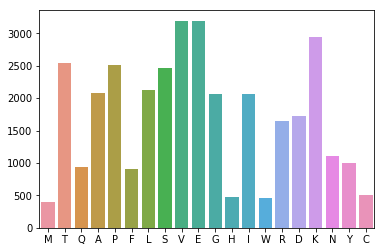

In [2]:
file_i_want = 'http://www.uniprot.org/uniprot/Q8WZ42.fasta' # url for the file I want
r = requests.get(file_i_want)
data = r.text # data is one long text string in this case
header = data.splitlines()[0] # split by line & get first entry
print(header)

aa_data = ''.join(data.splitlines()[1:]) # create one long string of amino acids
c = collections.Counter(aa_data) # create counter object
print(c.keys(), c.values())

# for plotting create pandas Series
aa_ser = pd.Series(c)

# and pass values to seaborn.barplot
sns.barplot(aa_ser.index, aa_ser.values)
plt.show()

## The obesity data

The UK government collects data on many and varied social and economic indicators. These data are hosted on the [digital.nhs.uk](https://digital.nhs.uk/data-and-information) website. In this tutorial we'll examine the rates of childhood obesity in England. In January 2015 the BBC reported that rates of childhood obesity in England were [levelling off](http://www.bbc.co.uk/news/health-31041864). We will use the public data to examine that claim.

The first step is to identify the data we want to use. The [digital.nhs.uk](https://digital.nhs.uk/data-and-information) website has a search tool on the front page and if we type 'obesity' into the search box we get back a list of results. On the left hand side of the page the link to 'Official statistics' takes us to assorted documents including Excel spreadsheets.

We'll use python to download the [Excel](https://files.digital.nhs.uk/publicationimport/pub23xxx/pub23742/obes-phys-acti-diet-eng-2017-tab.xlsx) file. Once we have that we'll use ```pandas``` to examine the data.

We will need the URL for the excel file we want and the easiest way to get this is to right click (or ctrl-click if on a mac) the 'Download' link for the [Excel](https://files.digital.nhs.uk/publicationimport/pub23xxx/pub23742/obes-phys-acti-diet-eng-2017-tab.xlsx) file on the site and then click on 'Copy Link Location' on the pop up dialogue. This should copy the download URL to the clipboard. Then we can just copy it into a variable in our script.

In [3]:
# Based on https://realpython.com/blog/python/analyzing-obesity-in-england-with-python/
import requests
import pandas as pd

# define what we want to download
file_i_want = "https://files.digital.nhs.uk/publicationimport/pub23xxx/pub23742/obes-phys-acti-diet-eng-2017-tab.xlsx"
r = requests.get(file_i_want) # grab the file
print(r)

<Response [200]>


Printing the result of the request isn't at first very informative. To understand what this ```<Response [200]>``` means we have to know that files are moved around over the world wide web using a protocol called HyperText Transport Protocol (HTTP). The computers on the web send various codes to each other after transfer of data to tell each other the outcome of that particular job. The code ```200``` means ```OK```. In other words the job succeeded. There's more on the code [here](https://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html) - it's pretty dry stuff... I only use this to look up the meaning of these codes.

In the next code block we'll first open a file to write the Excel data to. Notice that we use ```'wb'``` i.e. write a binary file because Excel is a binary and not a text format. We write the content of the file on the internet to our local computer and then open that in ```pandas``` for analysis.

In [4]:
# open file for writing
f_out = open('data/obesity_data.xlsx', 'wb')
# write the remote data 
f_out.write(r.content)
# close the new file
f_out.close()

# get the data into pandas
data = pd.ExcelFile('data/obesity_data.xlsx')

If you download the file directly and look at it in Excel you'll see that it contains several tabs with different information in each tab. The data we're interested in is in tab 3. 

We can use the ```sheet_names``` method to find out the names of the individual tabs. We want the data in tab 3 (i.e. Table 2) so we'll have to refer to this by name. We'll also skip the first 7 and last 14 rows since they don't contain data we're interested in.

In [5]:
print(data.sheet_names) # get tab names

['Contents', 'Table 1', 'Table 2', 'Table 3', 'Table 4', 'Table 5', 'Table 6', 'Table 7', 'Table 8', 'Table 9', 'Table 10', 'Table 11', 'Table 12', 'Table 13', 'Table 14']


In [6]:
# Read 2nd section, the obesity figures by age data
data_age = data.parse('Table 2', skiprows=7, skipfooter=14) # skip first 3 rows, last 14 rows
data_age # data

,"Year4,5",Unnamed: 1,All persons6,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005/06,NaN,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2,2006/07,NaN,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
3,2007/08,NaN,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
4,2008/09,NaN,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
5,2009/10,NaN,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
6,2010/11,NaN,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
7,2011/12,NaN,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0
8,2012/13,NaN,10957.0,556.0,356.0,1437.0,2744.0,3305.0,1965.0,495.0,99.0
9,2013/14,NaN,9325.0,548.0,352.0,1209.0,2133.0,2839.0,1663.0,458.0,123.0


We can see that ```pandas``` has recognised that column names but that there is a row and a column with ```NaN``` values. These need to be removed. 

There is a [```dropna```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) function in ```pandas``` and we can apply this to the rows and columns. In ```pandas``` the rows and columns are referred to as *axes*; axis 0 is the rows and axis 1 is the columns. In the call to the ```dropna``` function we pass in a tuple indicating that we want to drop ```NaN``` values from both rows and columns but only where **every** value in the row or column is ```NaN``` (```how='all'```). The ```inplace = True``` argument acts on the dataframe we have rather than making a copy in memory. Note that this means the **original data is changed**. This might not be what you always want.

In [7]:
data_age.dropna(axis = 0, how='all', inplace=True) # drop NaN rows
data_age.dropna(axis = 1, how='all', inplace=True) # drop NaN cols
data_age.head()

,"Year4,5",All persons6,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
3,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
4,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
5,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0


Let's also change the first two column names to make things easier for us.

In [8]:
# pass in dictionary to change column names, inplace=True to change the actual data
data_age.rename({'Year4,5':'Year', 'All persons6':'Total'}, axis='columns', inplace=True)
# check
data_age.columns
data_age.head()

,Year,Total,Under 16,16 to 24,25 to 34,35 to 44,45 to 54,55 to 64,65 to 74,75 and over
1,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
3,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
4,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
5,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0


If we want to use ```seaborn``` to plot this data we will have to convert it from wide to long form. We can do this using the ```pandas``` ```melt``` function.

In [9]:
data_age_m = pd.melt(data_age, id_vars='Year', var_name='Group', value_name='Number')
data_age_m.head()

,Year,Group,Number
0,2005/06,Total,2564.0
1,2006/07,Total,3862.0
2,2007/08,Total,5018.0
3,2008/09,Total,7988.0
4,2009/10,Total,10571.0


Now we've got to the stage where we have cleaned up data we can use for plotting and examining the trends in obesity for different age groups over time.

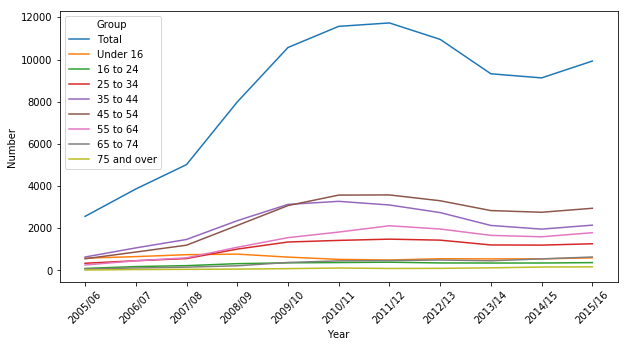

In [10]:
plt.figure(figsize=(10,5)) # set plot dimensions
sns.lineplot('Year', 'Number', hue='Group', data=data_age_m) # size argument sets plot size
plt.xticks(rotation=45) # rotate tick labels for clarity
plt.show()

Generally it looks as though obesity has been increasing over the years but the Total group dominates this plot and makes it hard to see what's going on in the individual age groups. We should drop ```Total``` from the plot and re-examine the data. 

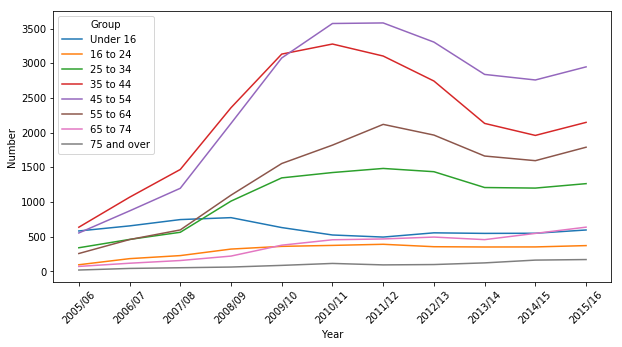

In [11]:
# Drop the total column and re-plot
plt.figure(figsize=(10,5)) # set plot dimensions
data_age_m = data_age_m[data_age_m.Group != 'Total'] # drop the rows with Total in them, simple filter
sns.lineplot('Year', 'Number', hue='Group', data=data_age_m)
plt.xticks(rotation=45)
plt.show()

It's clearer now that for certain age groups there has been a steep increase in obesity. We started with a question about obesity in children so let's do a final plot to examine our original question and see if childhood and adult obesity display the same trend.

In [12]:
keeps = ['Under 16', '16 to 24', '45 to 54'] # groups to keep
data_age_m = data_age_m[data_age_m['Group'].isin(keeps)]
data_age_m.head()

,Year,Group,Number
11,2005/06,Under 16,583.0
12,2006/07,Under 16,656.0
13,2007/08,Under 16,747.0
14,2008/09,Under 16,775.0
15,2009/10,Under 16,632.0


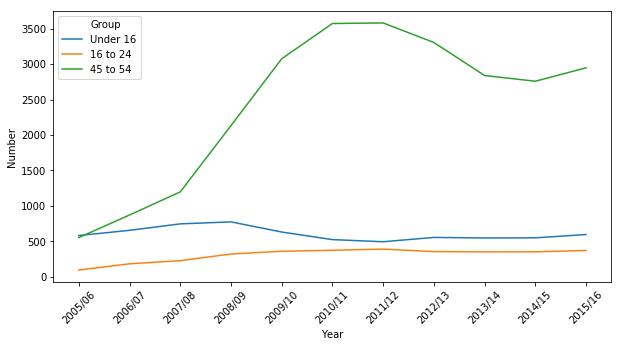

In [13]:
# plot the filtered data
plt.figure(figsize=(10,5)) # set plot dimensions
sns.lineplot('Year', 'Number', hue='Group', data=data_age_m)
plt.xticks(rotation=45)
plt.show()

From this we would conclude that over the past few years there has in fact been a slight drop and a plateau in childhood obesity. The parents of these children have however increased in weight substantially. However a few words of caution are required. Looking at the notes in the spreadsheet we began with we see that these numbers come from people who were hospitalised as a result of obesity:

> A finished admission episode (FAE) is the first period of inpatient care under one consultant within one healthcare provider. FAEs are counted against the year in which the admission episode finishes. Admissions do not represent the number of inpatients, as a person may have more than one admission within the year.									

It's reasonable to assume that only the sickest or most distressed obese children are admitted to hospital due to obesity directly. So these numbers are probably an under-estimate of the true rate of obesity in children and young adults. For the adults the story may be different. Adults (especially middle aged adults) are more likely to suffer ill effects. So we have to be cautious about our conclusions.

## Putting it together

One way we might get a more accurate idea of profound childhood obesity would be to look at individuals who were so severely obese that they underwent bariatric surgery. Table 9 in the spreadsheet details:

> Table 9: Finished Consultant Episodes with a primary diagnosis of obesity and a main or secondary procedure of 'Bariatric Surgery' by gender										

Use ```pandas``` to read in the spreadsheet. As above you'll have to supply the URL. Pull out the data on bariatric surgery and tidy it up. Create two plots side-by-side, one showing the trend for children (<16) and one showing the trend for 16-24 year olds. Do these trends look the same? What do you think this might say about youth obesity?

Hint: To carry out this task you'll need to load both ```pandas``` and ```requests```. Although we've used the ```subplot``` function in ```pyplot``` to draw figures side by side in this case we'll want to set up a proper figure object. In ```pyplot``` the [```figure```](http://matplotlib.org/api/figure_api.html#matplotlib.figure) (there's lots of documentation here!) function sets up a 'space' that will contain the elements of the figure (including subplots). For this task you'll want to set up a ```figure``` that is 8x4 inches using the [```figsize```](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure) argument. Then you can use the ```subplots``` function to set up subplots as before. You might want to use the [```subplots_adjust```](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.subplots_adjust) function with the ```wspace``` argument set to make sure there is adequate spacing between your plots.

## Homework

The [DataDryad digital](http://datadryad.org/) repository provides an online location where researchers can deposit raw data for others to examine or re-analyse:
>DataDryad.org is a curated general-purpose repository that makes the data underlying scientific publications discoverable, freely reusable, and citable. Dryad has integrated data submission for a growing list of journals; submission of data from other publications is also welcome. 

In this homework exercise we will download a dataset on exercise training and fish (really!) and re-create a couple of the figures from the associated paper. In 2013 Sinclair et al published a paper in Functional Ecology that claimed: 
>Exercise changes behaviour and may thereby alter interactions between individuals and dispersal. Environmental changes that demand increased levels of exercise induce behavioural responses that are likely to increase the success of individuals under these changed conditions.

The paper is available [here](http://dx.doi.org/10.1111/1365-2435.12198).

They published the data from their study as a series of Excel spreadsheets through the DataDryad website. The data are available [here](http://datadryad.org/bitstream/handle/10255/dryad.54583/Sinclair%20et%20al_all%20data.xlsx?sequence=1).

If the links aren't working for anyone the paper is:
Sinclair ELE, Noronha de Souza CR, Ward AJW, Seebacher F (2013) Exercise changes behaviour. Functional Ecology 28(3): 652–659. http://dx.doi.org/10.1111/1365-2435.12198

The data is available at:
http://datadryad.org/bitstream/handle/10255/dryad.54583/Sinclair%20et%20al_all%20data.xlsx?sequence=1

Use the data in the spreadsheet to reproduce figures 1 and 2a from the paper. 

For the figure 1 data carry out a one-way anova using the [```scipy.stats.f_oneway```](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.f_oneway.html) to examine whether there are differences between the treatments. As with the other tests you have used the ```scipy.stats.f_oneway``` function returns a tuple (F-value and $p$-value). Print an informative statement with the $p$-value telling the reader whether there is statistical significance between the groups or not.

Hint: When reading in the data you can use the ```parse_cols``` argument in the ```parse``` function to prevent reading in extra columns (see the [```pandas.ExcelFile.parse```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.ExcelFile.parse.html) documentation).

For figure 2a use the ```pyplot.figure()``` and ```pyplot.subplot()``` commands to place the subplots properly. You'll also need to adjust the ```wspace``` and ```hspace``` arguments to space your plots correctly and the ```seaborn.regplot()``` function to draw the scatterplots (```seaborn.lmplot()``` won't work here).